In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Digital Processing Image
### Operações no domínio de frequência
### Ulilé

In [ ]:
img =  cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

# Questão 1

#### FFT using OpenCV

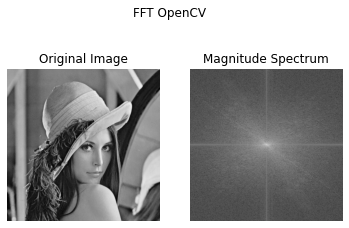

In [ ]:
dft_img = cv2.dft(np.float64(img), flags=cv2.DFT_COMPLEX_OUTPUT)
full_fft = np.fft.fftshift(dft_img)

mag_spect = 20 * np.log(cv2.magnitude(full_fft[:,:, 0], full_fft[:,:, 1]))


plt.subplot(121).set_xticks([])
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(122).set_xticks([])
plt.imshow(mag_spect, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.axis("off")

plt.suptitle("FFT OpenCV")
plt.show()

#### FFT using NumPy

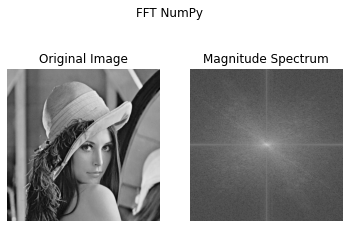

In [ ]:
fft_img = np.fft.fftshift(np.fft.fft2(img))

mag_spect = 20 * np.log(np.abs(fft_img))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(122)
plt.imshow(mag_spect, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.axis("off")

plt.suptitle("FFT NumPy")
plt.show()

# Questão 2

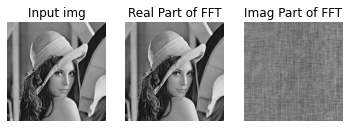

In [ ]:
fft = np.fft.fftshift(np.fft.fft2(img))

img_back = np.fft.ifft2(np.fft.ifftshift(fft))
fft_re = np.real(img_back)
fft_im = np.imag(img_back)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Input img")

plt.subplot(132)
plt.imshow(fft_re, cmap='gray')
plt.axis('off')
plt.title('Real Part of FFT')

plt.subplot(133)
plt.imshow(fft_im, cmap='gray')
plt.axis('off')
plt.title('Imag Part of FFT')

plt.show()

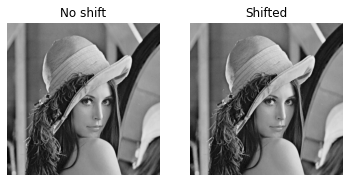

In [ ]:
fft_noshift= np.fft.fft2(img)
fft_shifted = np.fft.fftshift(fft_noshift)

irow, icol = img.shape[0] // 2, img.shape[1] // 2

#fft_noshift[irow - 30:irow + 31, icol - 30:icol+31] = 0
#fft_shifted[irow - 30:irow + 31, icol - 30:icol+31] = 0

img_noshift = np.fft.ifft2(fft_noshift)
img_shifted = np.fft.ifft2(np.fft.ifftshift(fft_shifted))

img_noshift = np.real(img_noshift)
img_shifted = np.real(img_shifted)


plt.subplot(121)
plt.imshow(img_noshift, cmap='gray')
plt.axis('off')
plt.title("No shift")

plt.subplot(122)
plt.imshow(img_shifted, cmap='gray')
plt.axis('off')
plt.title('Shifted')

plt.show()

# Questão 3

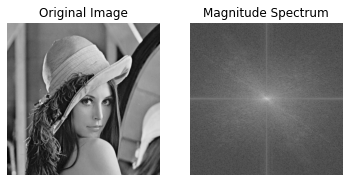

In [ ]:
fft_img = np.fft.fftshift(np.fft.fft2(img))

mag_spect = 20 * np.log(np.abs(fft_img))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(122)
plt.imshow(mag_spect, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.axis("off")
plt.show()

# Questão 4

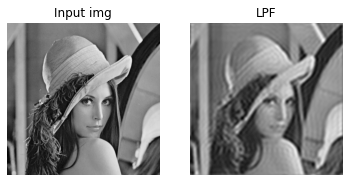

In [ ]:
irow, icol = img.shape[0] // 2, img.shape[1] // 2
row, col = img.shape

ft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
fft_shifted = np.fft.fftshift(ft)

mask = np.zeros((row,col, 2), np.uint8)
mask[irow - 30:irow + 30, icol - 30:icol + 30] = 1

fft_shifted = fft_shifted * mask

img_back = cv2.idft(np.fft.ifftshift(fft_shifted))
img_back = cv2.magnitude(img_back[:,:, 0], img_back[:,:, 1])

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Input img")

plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.title('LPF')

plt.show()

# Questão 5

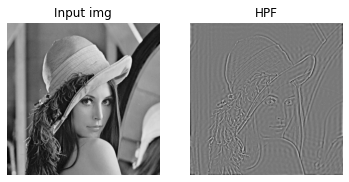

In [ ]:
irow, icol = img.shape[0] // 2, img.shape[1] // 2

fft_shifted = np.fft.fftshift(np.fft.fft2(img))

fft_shifted[irow - 30:irow + 30, icol - 30:icol + 30] = 0

img_back = np.fft.ifft2(np.fft.ifftshift(fft_shifted))
img_back = np.real(img_back)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Input img")

plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.title('HPF')

plt.show()